In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from scipy.integrate import odeint
import scipy

In [2]:
def toggle_switch(yz, t, beta_y, beta_z, n_x, n_y, Km1, Km2, delta):
    """
    Right hand side for cascade X -> Y -> Z.  Return dy/dt and dz/dt.
    """
    # Unpack y and z
    y, z = yz

    # Compute dy/dt
    dy_dt = beta_y/ (1 + (z/Km1)**n_x) - delta*y
    
    # Compute dz/dt
    dz_dt = beta_z/ (1 + (y/Km2)**n_y) - delta*z
    
    
    # Return the result as a NumPy array
    return np.array([dy_dt, dz_dt])

In [3]:
def general_toggle_switch(yz, t, *args):
    """
    Right hand side for cascade X -> Y -> Z.  Return dy/dt and dz/dt.
    """
    #args = (np.array(args).reshape(2, 6))
    args1 = np.array([args[0], args[1], args[2], args[3], args[4], args[5], args[6], args[7]])
    args2 = np.array([args[8], args[9], args[10], args[11], args[4], args[5], args[12], args[13]])
    
    # Unpack y and z
    y, z = yz
    
    # Compute dy/dt
    dy_dt = generalized_hill_function(yz, args1) - args1[7]*y
    
    # Compute dz/dt
    dz_dt = generalized_hill_function(yz, args2) - args2[7]*z
    
    # Return the result as a NumPy array
    return np.array([dy_dt, dz_dt])

In [56]:
def generalized_hill_function(y, args):
    a1    = 0#args[0]
    a2    = 0#args[1]
    b1    = args[2]
    b2    = args[3]
    n1    = args[4]
    n2    = args[5]
    beta  =
    args[6]
    x1, x2= y
    return beta*(1 + a1*x1**n1 + a2*x2**n2)/(1 + b1*x1**n1 + b2*x2**n2)

In [57]:
def residuals(p):
    p = tuple(p)
    sim_P = odeint(general_toggle_switch, iv, t, args = p).T
    #print(sim_P)
    res = (sim_P - exp_P)**2
    #print(np.sum(res.flatten()**2))
    return res.flatten()

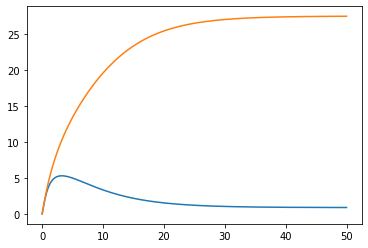

In [58]:
# Number of time points we want for the solutions
n = 800

# Time points we want for the solution
t = np.linspace(0, 50, n)

# Initial condition
iv = yz_0 = np.array([0.0, 0.0])

# Parameters
beta_y = 5.0
beta_z = 5.0
n_x = 2
n_y = 2
x_0 = 2.0
Km1 = 5
Km2 = 10
delta = 0.18


# Package parameters into a tuple
args = (beta_y, beta_z, n_x, n_y, Km1, Km2, delta)

# Integrate ODES
yz_og = scipy.integrate.odeint(toggle_switch, yz_0, t, args=args).T

y_og, z_og = yz_og[0], yz_og[1]

plt.plot(t, y_og)
plt.plot(t, z_og)

In [60]:
y_og_scaled = []
z_og_scaled = []

for i in range(0, len(y_og)):
    y_og_scaled.append((y_og[i] - np.mean(y_og))/np.std(y_og))
    z_og_scaled.append((z_og[i] - np.mean(z_og))/np.std(z_og))
    
y_og_scaled = np.array(y_og_scaled) + np.abs(np.min((y_og_scaled)))
z_og_scaled = np.array(z_og_scaled) + np.abs(np.min((z_og_scaled)))

                                             
#for ii in range()

In [61]:
yz_scaled = np.array(list(zip(y_og_scaled, z_og_scaled))).T

In [62]:
exp_P = yz_scaled# + np.random.randn(len(yz_og))*0.5
exp_P = exp_P#[::5]

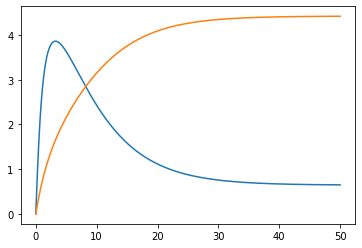

In [63]:
plt.plot(t, y_og_scaled)
plt.plot(t, z_og_scaled)

In [ ]:
a1    = 0#args[0]
a2    = 0#args[1]
b1    = args[2]
b2    = args[3]
n1    = args[4]
n2    = args[5]
beta  = args[6]

In [70]:
initial_guess = [0, 0, 5, 3, 1, 2, 5, 0, 0, 1, 4, 1, 1, 1]
fitted_params = least_squares(residuals, initial_guess, bounds=(0, np.inf), method = 'trf', max_nfev=10000, verbose=2, ftol=1e-012, xtol=1e-012).x



   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         9.2210e+05                                    6.97e+07    
       1              2         1.7371e+05      7.48e+05       7.18e+00       1.07e+07    
       2              4         1.7290e+04      1.56e+05       2.66e+00       3.62e+05    
       3              6         5.9678e+03      1.13e+04       9.98e-01       7.28e+04    
       4              7         2.5535e+03      3.41e+03       1.99e+00       1.36e+04    
       5              8         1.3341e+03      1.22e+03       5.10e+00       2.90e+03    
       6              9         1.0476e+03      2.86e+02       3.53e+00       6.76e+02    
       7             11         9.5872e+02      8.89e+01       1.44e+00       3.03e+02    
       8             13         9.1939e+02      3.93e+01       6.26e-01       2.81e+02    
       9             14         8.8006e+02      3.93e+01       1.12e+00       6.55e+02    

      91             119        2.8387e-04      1.04e-08       7.10e-03       1.95e-03    
      92             120        2.8385e-04      2.02e-08       1.62e-03       1.16e-04    
      93             121        2.8383e-04      2.57e-08       5.10e-03       5.80e-04    
      94             122        2.8379e-04      3.51e-08       8.36e-03       1.60e-04    
      95             123        2.8368e-04      1.13e-07       3.07e-02       1.32e-03    
      96             125        2.8365e-04      3.24e-08       3.19e-03       4.12e-04    
      97             126        2.8361e-04      3.64e-08       7.74e-03       2.19e-05    
      98             127        2.8354e-04      7.17e-08       1.59e-02       2.65e-05    
      99             128        2.8340e-04      1.42e-07       3.11e-02       8.76e-04    
      100            130        2.8338e-04      1.58e-08       7.95e-03       1.05e-03    
      101            131        2.8338e-04      5.96e-09       6.28e-03       3.76e-03    

      183            222        2.8024e-04      3.05e-08       5.05e-03       6.48e-04    
      184            223        2.8020e-04      3.71e-08       8.16e-03       6.58e-04    
      185            224        2.8013e-04      7.38e-08       1.42e-02       6.06e-04    
      186            226        2.8011e-04      1.83e-08       3.44e-03       4.84e-04    
      187            227        2.8007e-04      4.08e-08       7.50e-03       2.88e-05    
      188            228        2.7999e-04      8.10e-08       1.53e-02       4.86e-05    
      189            229        2.7983e-04      1.60e-07       3.00e-02       9.86e-04    
      190            231        2.7981e-04      1.96e-08       7.92e-03       1.16e-03    
      191            232        2.7980e-04      6.25e-09       6.29e-03       4.32e-03    
      192            233        2.7977e-04      2.74e-08       1.98e-03       1.98e-04    
      193            234        2.7975e-04      1.89e-08       2.95e-03       9.17e-04    

      275            327        2.7491e-04      9.52e-08       1.45e-02       3.83e-05    
      276            328        2.7472e-04      1.91e-07       2.87e-02       6.17e-05    
      277            329        2.7437e-04      3.51e-07       5.67e-02       5.80e-03    
      278            332        2.7432e-04      4.41e-08       3.78e-03       1.47e-04    
      279            333        2.7428e-04      3.86e-08       5.79e-03       7.11e-04    
      280            334        2.7423e-04      5.45e-08       8.55e-03       8.57e-05    
      281            335        2.7410e-04      1.30e-07       1.98e-02       1.10e-03    
      282            337        2.7406e-04      3.64e-08       8.92e-03       1.08e-03    
      283            338        2.7398e-04      7.97e-08       1.11e-02       3.50e-03    
      284            339        2.7397e-04      1.35e-08       7.85e-03       2.71e-03    
      285            340        2.7394e-04      3.19e-08       1.63e-03       1.46e-04    

      366            433        2.6658e-04      1.20e-07       1.34e-02       5.09e-05    
      367            434        2.6642e-04      1.60e-07       1.82e-02       1.35e-03    
      368            436        2.6637e-04      5.06e-08       8.61e-03       1.10e-03    
      369            437        2.6627e-04      9.60e-08       1.07e-02       4.20e-03    
      370            438        2.6625e-04      2.30e-08       7.72e-03       3.31e-03    
      371            439        2.6621e-04      3.93e-08       1.60e-03       1.69e-04    
      372            440        2.6616e-04      4.93e-08       4.82e-03       8.43e-04    
      373            441        2.6611e-04      5.70e-08       7.71e-03       1.67e-03    
      374            442        2.6609e-04      1.65e-08       7.03e-03       4.25e-03    
      375            443        2.6605e-04      3.79e-08       1.57e-03       2.12e-04    
      376            444        2.6600e-04      4.86e-08       4.88e-03       1.03e-03    

      458            548        2.5015e-04      2.29e-07       1.52e-02       5.00e-04    
      459            550        2.5005e-04      1.01e-07       7.74e-03       5.48e-03    
      460            551        2.4999e-04      5.75e-08       6.77e-03       4.92e-03    
      461            552        2.4994e-04      5.04e-08       7.04e-03       6.77e-03    
      462            553        2.4988e-04      6.07e-08       1.57e-03       3.74e-04    
      463            554        2.4984e-04      4.18e-08       2.43e-03       1.44e-03    
      464            555        2.4978e-04      5.55e-08       3.69e-03       9.18e-05    
      465            556        2.4961e-04      1.75e-07       1.17e-02       4.56e-05    
      466            557        2.4926e-04      3.54e-07       2.34e-02       7.51e-05    
      467            558        2.4875e-04      5.03e-07       4.59e-02       1.69e-02    
      468            560        2.4854e-04      2.18e-07       6.90e-03       3.90e-03    

      549            661        2.0563e-04      9.33e-07       2.53e-02       8.25e-04    
      550            663        2.0532e-04      3.07e-07       9.63e-03       5.52e-03    
      551            665        2.0515e-04      1.76e-07       4.86e-03       1.18e-03    
      552            666        2.0491e-04      2.36e-07       6.08e-03       1.22e-03    
      553            667        2.0445e-04      4.67e-07       1.27e-02       7.83e-05    
      554            668        2.0349e-04      9.55e-07       2.51e-02       7.53e-04    
      555            670        2.0304e-04      4.52e-07       1.23e-02       4.41e-03    
      556            671        2.0287e-04      1.64e-07       1.95e-02       2.19e-02    
      557            672        2.0229e-04      5.80e-07       4.31e-03       2.34e-04    
      558            673        2.0205e-04      2.41e-07       5.82e-03       3.17e-03    
      559            674        2.0167e-04      3.79e-07       9.98e-03       1.67e-04    

      642            780        9.0151e-05      1.94e-06       1.82e-02       7.62e-04    
      643            781        8.6333e-05      3.82e-06       3.72e-02       9.92e-03    
      644            782        8.0847e-05      5.49e-06       7.12e-02       4.37e-02    
      645            783        7.1199e-05      9.65e-06       1.37e-01       1.31e-02    
      646            786        6.7859e-05      3.34e-06       1.83e-02       1.12e-02    
      647            787        6.5498e-05      2.36e-06       2.20e-02       7.17e-04    
      648            788        6.1687e-05      3.81e-06       3.49e-02       5.20e-03    
      649            790        6.0873e-05      8.14e-07       1.75e-02       3.13e-02    
      650            791        5.8017e-05      2.86e-06       1.76e-02       1.24e-03    
      651            792        5.4281e-05      3.74e-06       4.51e-02       6.58e-03    
      652            794        5.2388e-05      1.89e-06       1.76e-02       6.40e-03    

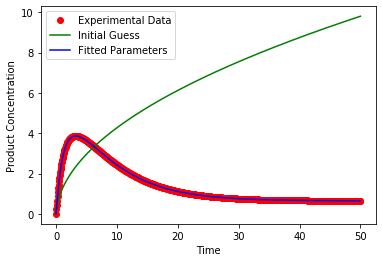

In [71]:
plt.plot(t, exp_P[0], 'ro')
plt.plot(t, odeint(general_toggle_switch, iv, t, args = tuple(initial_guess)).T[0], 'g-')
plt.plot(t, odeint(general_toggle_switch, iv, t, args = tuple(fitted_params)).T[0], 'b-')
plt.legend(['Experimental Data', 'Initial Guess', 'Fitted Parameters'], loc = 'best')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.show()

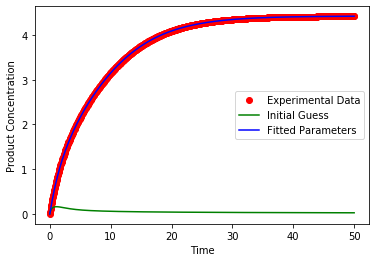

In [72]:
plt.plot(t, exp_P[1], 'ro')
plt.plot(t, odeint(general_toggle_switch, iv, t, args = tuple(initial_guess)).T[1], 'g-')
plt.plot(t, odeint(general_toggle_switch, iv, t, args = tuple(fitted_params)).T[1], 'b-')
plt.legend(['Experimental Data', 'Initial Guess', 'Fitted Parameters'], loc = 'best')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.show()

In [73]:
a1_node1 = fitted_params[0]
b1_node1 = fitted_params[1]
a2_node1 = fitted_params[2]
b2_node1 = fitted_params[3]
n1 = fitted_params[4]
n2 = fitted_params[5]
beta_node1 = fitted_params[6]
delta_node1 = fitted_params[7]

a1_node2 = fitted_params[8]
b1_node2 = fitted_params[9]
a2_node2 = fitted_params[10]
b2_node2 = fitted_params[11]
beta_node2 = fitted_params[12]
delta_node2 = fitted_params[13]



In [74]:
from IPython.display import Latex

Latex('$\\frac{1+'+str(int(a1_node2))+'x_1^{'+str(int(n1))+'}+'+str(int(a2_node2))+'x_2^{'+str(int(n2))+'}}{1+'+str(int(b1_node2))+'x_1^{'+str(int(n1))+'}+'+str(int(b2_node2))+'x_2^{'+str(int(n2))+'}}$')

<IPython.core.display.Latex object>

In [75]:
Latex('$\\frac{1+'+str(int(a1_node1))+'x_1^{'+str(int(n1))+'}+'+str(int(a2_node1))+'x_2^{'+str(int(n2))+'}}{1+'+str(int(b1_node1))+'x_1^{'+str(int(n1))+'}+'+str(int(b2_node1))+'x_2^{'+str(int(n2))+'}}$')

<IPython.core.display.Latex object>

# Node 1

In [76]:
from IPython.display import Latex

Latex('$\dot{x}_1 = \\frac{1+'+str((a1_node1))+'x_1^{'+str((n1))+'}+'+str((a2_node1))+'x_2^{'+str((n2))+'}}{1+'+str((b1_node1))+'x_1^{'+str((n1))+'}+'+str((b2_node1))+'x_2^{'+str((n2))+'}} - ' + str(delta_node1)+'x_1 $')

<IPython.core.display.Latex object>

In [78]:
Latex('$\dot{x}_2 = \\frac{1+'+str((a1_node2))+'x_1^{'+str((n1))+'}+'+str((a2_node2))+'x_2^{'+str((n2))+'}}{1+'+str((b1_node2))+'x_1^{'+str((n1))+'}+'+str((b2_node2))+'x_2^{'+str((n2))+'}} - ' + str(delta_node2)+'x_2 $')

<IPython.core.display.Latex object>

In [175]:
fitted_params

array([ 4.27400995e-01, -3.11232534e-01,  2.53493571e-02,  6.17897403e-02,
        1.08354256e+00,  3.24787384e-01,  7.51857915e+00,  3.24020050e+00,
       -3.10881339e-01,  2.26759710e+00,  5.93163876e-03,  3.47355876e-01,
        2.36944163e+00,  3.13245405e-01])